# Latar Belakang
Project data analysis menggunakan data set Kaggle "Customer Personality Analysis" bertujuan untuk memahami perilaku dan preferensi pembelian pelanggan dari sebuah perusahaan ritel di Indonesia. Dengan menganalisis data, kita dapat menemukan insight dan tren dalam perilaku pelanggan yang dapat membantu perusahaan dalam pengambilan keputusan bisnis seperti strategi pemasaran, pengembangan produk, dan manajemen pelanggan.


## Pernyataan Masalah
Pernyataan masalah dalam project data analysis data set Kaggle *Customer Personality Analysis* adalah bagaimana memahami perilaku pelanggan dan faktor-faktor yang memengaruhinya dalam hal preferensi merek, gaya hidup, dan pola pembelian. Selain itu, bagaimana mengoptimalkan strategi pemasaran, pengembangan produk, dan manajemen pelanggan yang lebih efektif dengan memanfaatkan data dan insight yang ditemukan melalui analisis data.

# 1. Import Library
Untuk menjawab pertanyaan yang telah disebutkan sebelumnya, kita akan melakukan analisis pada data pelanggan yang telah dikumpulkan oleh perusahaan. Dataset tersebut tersedia dan dapat diakses. [di sini](https://www.kaggle.com/datasets/imakash3011/customer-personality-analysis). 

In [190]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from scipy.stats import normaltest, chi2_contingency, mannwhitneyu, ttest_ind
import datetime as dt


import warnings
warnings.filterwarnings("ignore")

Dataset Customer Personality Analysis yang tersedia adalah sebuah dataset yang berisi informasi tentang karakteristik dan perilaku pelanggan yang diperoleh melalui survei online. Berikut detail datanya:

People: 
* ID: ID unik pelanggan
* Year_Birth: Tahun lahir pelanggan
* Education: Tingkat pendidikan pelanggan
* Marital_Status: Status perkawinan pelanggan
* Income: Pendapatan rumah tangga tahunan pelanggan
* Kidhome: Jumlah anak dalam rumah tangga pelanggan
* Teenhome: Jumlah remaja dalam rumah tangga pelanggan
* Dt_Customer: Tanggal pendaftaran pelanggan
* Recency: Jumlah hari sejak pembelian terakhir pelanggan
* Complain: 1 jika pelanggan melakukan komplain dalam 2 tahun terakhir, 0 jika tidak 

Products:
* MntWines: Jumlah yang dihabiskan untuk wine dalam 2 tahun terakhir
* MntFruits: Jumlah yang dibelanjakan untuk buah-buahan dalam 2 tahun terakhir
* MntMeatProducts: Jumlah yang dihabiskan untuk daging dalam 2 tahun terakhir
* MntFishProducts: Jumlah yang dihabiskan untuk membeli ikan dalam 2 tahun terakhir
* MntSweetProducts: Jumlah yang dibelanjakan untuk permen dalam 2 tahun terakhir
* MntGoldProds: Jumlah yang dibelanjakan untuk emas dalam 2 tahun terakhir

Promotion:
* NumDealsPurchases: Jumlah pembelian yang dilakukan dengan diskon
* AcceptedCmp1: 1 jika pelanggan menerima penawaran di kampanye pertama, 0 jika tidak
* AcceptedCmp2: 1 jika pelanggan menerima penawaran di kampanye ke-2, 0 jika tidak
* AcceptedCmp3: 1 jika pelanggan menerima penawaran di kampanye ke-3, 0 jika tidak
* AcceptedCmp4: 1 jika pelanggan menerima penawaran di kampanye ke-4, 0 jika tidak
* AcceptedCmp5: 1 jika pelanggan menerima tawaran di kampanye ke-5, 0 jika tidak
* Response: 1 jika pelanggan menerima tawaran di kampanye terakhir, 0 sebaliknya

Place:
* NumWebPurchases: Jumlah pembelian yang dilakukan melalui situs web perusahaan
* NumCatalogPurchases: Jumlah pembelian yang dilakukan menggunakan katalog
* NumStorePurchases: Jumlah pembelian yang dilakukan langsung di toko
* NumWebVisitsMonth: Jumlah kunjungan ke situs web perusahaan dalam sebulan terakhir

Berikut 5 baris teratas dan terbawah dari dataset *Customer Personality Analysis*.

# 2. Import Data

In [191]:
df=pd.read_csv('marketing_campaign.csv', sep = "\t")
df.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,5524,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,...,7,0,0,0,0,0,0,3,11,1
1,2174,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,...,5,0,0,0,0,0,0,3,11,0
2,4141,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,...,4,0,0,0,0,0,0,3,11,0
3,6182,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,...,6,0,0,0,0,0,0,3,11,0
4,5324,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,...,5,0,0,0,0,0,0,3,11,0


# 3. Data Preparation
## 3.1 Checking & Handling Missing Value

In [192]:
print(f'Jumlah baris dan kolom di dataset df adalah {df.shape}')
df.info()

Jumlah baris dan kolom di dataset df adalah (2240, 29)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-nul

In [193]:
display(df.describe(), df.describe(include='object'))

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


,Education,Marital_Status,Dt_Customer
count,2240,2240,2240
unique,5,8,663
top,Graduation,Married,31-08-2012
freq,1127,864,12


### Missing Value

In [194]:
# persentase missing value di tiap kolom
df.isna().sum()/df.shape[0]*100

ID                     0.000000
Year_Birth             0.000000
Education              0.000000
Marital_Status         0.000000
Income                 1.071429
Kidhome                0.000000
Teenhome               0.000000
Dt_Customer            0.000000
Recency                0.000000
MntWines               0.000000
MntFruits              0.000000
MntMeatProducts        0.000000
MntFishProducts        0.000000
MntSweetProducts       0.000000
MntGoldProds           0.000000
NumDealsPurchases      0.000000
NumWebPurchases        0.000000
NumCatalogPurchases    0.000000
NumStorePurchases      0.000000
NumWebVisitsMonth      0.000000
AcceptedCmp3           0.000000
AcceptedCmp4           0.000000
AcceptedCmp5           0.000000
AcceptedCmp1           0.000000
AcceptedCmp2           0.000000
Complain               0.000000
Z_CostContact          0.000000
Z_Revenue              0.000000
Response               0.000000
dtype: float64

Hasil identifikasi missing value:
* Dikarenakan kolom Income memiliki nilai missing values < 5%, maka dapat di handling dengan menggunakan mean

Terdapat dua opsi dalam menangani *missing value*:

* Pertama, menghapus baris atau kolom yang mengandung *missing value*.
* Kedua, mengisi data yang hilang, Ada beberapa metode yang dapat digunakan untuk mengisi *missing value*, namun metode terbaik adalah menggantikan data yang hilang dengan nilai yang sesuai atau setidaknya mendekati nilai aslinya, berdasarkan kolom lain yang secara domain knowledge atau secara statistik berkaitan dengan kolom yang memiliki *missing value*. Jika ada kolom yang tidak dapat diisi dengan cara tersebut, barulah mengisi dengan nilai rata-rata, median, atau modus. Menghapus data seharusnya akan menjadi opsi terakhir.

In [195]:
df_baru = df.copy()

In [196]:
# mengisi data kosong dengan nilai 'rata-rata' pada 'income' 
df_baru['Income'].fillna(df['Income'].mean(), inplace=True)


In [197]:
# jumlah data kosong setelah pengisian
df_baru[['Income']].isna().sum()

Income    0
dtype: int64

# 3.2 Checking & Handling Duplicated Value

In [198]:
pd.set_option('display.max_colwidth', -1)
# data di tiap kolom
listItem = []
for col in df_baru.columns :
    listItem.append( [col, df_baru[col].nunique(), df_baru[col].unique()])

tabel1Desc = pd.DataFrame(columns=['Column Name', 'Number of Unique', 'Unique Sample'],
                     data=listItem)
tabel1Desc

,Column Name,Number of Unique,Unique Sample
0,ID,2240,"[5524, 2174, 4141, 6182, 5324, 7446, 965, 6177, 4855, 5899, 1994, 387, 2125, 8180, 2569, 2114, 9736, 4939, 6565, 2278, 9360, 5376, 1993, 4047, 1409, 7892, 2404, 5255, 9422, 1966, 6864, 3033, 5710, 7373, 8755, 10738, 4339, 10755, 8595, 2968, 8601, 503, 8430, 7281, 2139, 1371, 9909, 7286, 7244, 6566, 8614, 4114, 1331, 2225, 9381, 6260, 10383, 7437, 8557, 8375, 6853, 3076, 1012, 6518, 4137, 8082, 1386, 9369, 4477, 1357, 1402, 10629, 6312, 8132, 1050, 5846, 1859, 7503, 10401, 1618, 3332, 2261, 5346, 4119, 535, 5268, 273, 4452, 8504, 771, 8996, 9235, 5798, 11178, 2230, 7516, 7247, 11100, 4646, 3037, ...]"
1,Year_Birth,59,"[1957, 1954, 1965, 1984, 1981, 1967, 1971, 1985, 1974, 1950, 1983, 1976, 1959, 1952, 1987, 1946, 1980, 1949, 1982, 1979, 1951, 1969, 1986, 1989, 1963, 1970, 1973, 1943, 1975, 1996, 1968, 1964, 1977, 1978, 1955, 1966, 1988, 1948, 1958, 1972, 1960, 1945, 1991, 1962, 1953, 1961, 1956, 1992, 1900, 1893, 1990, 1947, 1899, 1993, 1994, 1941, 1944, 1995, 1940]"
2,Education,5,"[Graduation, PhD, Master, Basic, 2n Cycle]"
3,Marital_Status,8,"[Single, Together, Married, Divorced, Widow, Alone, Absurd, YOLO]"
4,Income,1975,"[58138.0, 46344.0, 71613.0, 26646.0, 58293.0, 62513.0, 55635.0, 33454.0, 30351.0, 5648.0, 52247.25135379061, 7500.0, 63033.0, 59354.0, 17323.0, 82800.0, 41850.0, 37760.0, 76995.0, 33812.0, 37040.0, 2447.0, 58607.0, 65324.0, 40689.0, 18589.0, 53359.0, 38360.0, 84618.0, 10979.0, 38620.0, 40548.0, 46610.0, 68657.0, 49389.0, 67353.0, 23718.0, 42429.0, 48948.0, 80011.0, 20559.0, 21994.0, 79941.0, 41728.0, 72550.0, 65486.0, 79143.0, 35790.0, 82582.0, 66373.0, 82384.0, 70287.0, 27938.0, 55954.0, 75777.0, 66653.0, 61823.0, 67680.0, 70666.0, 25721.0, 32474.0, 88194.0, 69096.0, 74854.0, 66991.0, 65031.0, 60631.0, 28332.0, 40246.0, 75251.0, 75825.0, 26326.0, 56046.0, 29760.0, 26304.0, 23559.0, 81361.0, 29440.0, 36138.0, 50388.0, 79593.0, 54178.0, 42394.0, 23626.0, 30096.0, 47916.0, 51813.0, 78497.0, 50150.0, 47823.0, 34554.0, 85693.0, 65846.0, 87195.0, 24594.0, 49096.0, 52413.0, 38557.0, 89058.0, 77298.0, ...]"
5,Kidhome,3,"[0, 1, 2]"
6,Teenhome,3,"[0, 1, 2]"
7,Dt_Customer,663,"[04-09-2012, 08-03-2014, 21-08-2013, 10-02-2014, 19-01-2014, 09-09-2013, 13-11-2012, 08-05-2013, 06-06-2013, 13-03-2014, 15-11-2013, 10-10-2012, 24-11-2012, 24-12-2012, 31-08-2012, 28-03-2013, 03-11-2012, 08-08-2012, 06-01-2013, 23-12-2012, 11-01-2014, 18-03-2013, 02-01-2013, 27-05-2013, 20-02-2013, 31-05-2013, 22-11-2013, 22-05-2014, 11-05-2013, 29-10-2012, 29-08-2013, 31-12-2013, 02-09-2013, 11-02-2014, 01-02-2013, 29-04-2013, 12-03-2013, 05-11-2013, 02-10-2013, 28-06-2014, 09-11-2012, 24-05-2013, 01-01-2014, 08-11-2012, 12-05-2014, 11-08-2012, 07-06-2014, 12-06-2013, 19-11-2012, 02-04-2013, 28-04-2014, 17-06-2013, 03-03-2014, 04-07-2013, 07-09-2012, 18-02-2013, 11-06-2013, 06-12-2013, 21-05-2013, 11-05-2014, 19-03-2014, 27-09-2013, 08-04-2013, 11-09-2012, 14-09-2012, 17-03-2013, 05-04-2013, 30-04-2014, 19-12-2012, 27-08-2012, 12-10-2012, 04-09-2013, 29-08-2012, 23-06-2013, 03-07-2013, 25-02-2014, 11-08-2013, 16-07-2013, 28-05-2014, 21-01-2014, 27-05-2014, 23-11-2013, 23-03-2014, 24-05-2014, 22-11-2012, 11-04-2013, 01-12-2013, 20-06-2013, 23-07-2013, 30-03-2014, 20-04-2013, 17-05-2013, 08-05-2014, 10-12-2013, 24-09-2013, 02-02-2013, 07-12-2012, 02-11-2013, 10-11-2012, 25-06-2014, ...]"
8,Recency,100,"[58, 38, 26, 94, 16, 34, 32, 19, 68, 11, 59, 82, 53, 23, 51, 20, 91, 86, 41, 42, 63, 0, 69, 89, 4, 96, 56, 31, 8, 55, 37, 76, 99, 3, 88, 80, 72, 24, 92, 39, 29, 2, 54, 57, 30, 12, 18, 75, 90, 1, 25, 40, 9, 87, 5, 95, 48, 70, 79, 45, 84, 44, 43, 35, 15, 17, 46, 27, 74, 85, 65, 13, 83, 10, 21, 61, 73, 47, 36, 49, 28, 64, 98, 78, 77, 81, 14, 52, 93, 50, 60, 66, 97, 62, 6, 33, 67, 22, 71, 7]"
9,MntWines,776,"[635, 11, 426, 173, 520, 235, 76, 14, 28, 5, 6, 194, 233, 3, 1006, 53, 84, 1012, 4, 86, 1, 867, 384, 270, 36, 684, 8, 112, 110, 96, 482, 40, 702, 55, 437, 421, 13, 9, 81, 123, 48, 826, 245, 6

Secara keseluruhan, terdapat beberapa hal yang dapat dilihat dari dataset *Customer Personality Analysis*:

* Jumlah kolom dalam dataset adalah 29 dan terdapat 2240 baris data.
* Pada kolom ID terdapat 2240 data, maka dapat disimpulkan bahwa tidak terdapat data yang *duplicate*.
* Kolom `income` memiliki data kosong yang diwakili oleh 24 nilai NaN.
* Terdapat beberapa kolom yang tipe datanya seharusnya diubah, misalnya dari 'object' menjadi 'category'.

# 4. Data Analysis
Kita sudah menghilangkan _missing value_. Sekarang, kita bisa mulai melakukan analisis untuk mencari tahu ***Bagaimana perilaku dan preferensi pembelian pelanggan di perusahaan ritel di Indonesia, dan faktor-faktor apa yang memengaruhi perilaku pembelian mereka?****.  


## 4.1 Statistical Summary

Kemudian, saya menyalin (meng-copy) data yang sudah ada ke dalam variabel baru bernama df_baru2. Dengan begitu, df_baru2 akan memiliki nilai yang sama dengan data, sehingga kita dapat mengedit atau memanipulasi df_baru2 tanpa mengubah nilai asli dari data.

Dalam pengolahan data, ini berguna untuk melakukan *pre-processing* atau *cleaning data*, di mana kita dapat mengedit atau membersihkan df_baru2 tanpa mengubah nilai asli dari data. Sehingga, jika terjadi kesalahan dalam *pre-processing*, kita masih memiliki data yang asli sebagai acuan.

In [199]:
df_baru2 = df.copy()

### 4.1.1 Numerical Column

membuat list bernama "numerical" yang berisi kolom-kolom numerik dari dataset yang digunakan dalam project data analysis, yang nantinya dapat digunakan untuk melakukan manipulasi data numerik, seperti melakukan perhitungan statistik dan visualisasi

In [200]:
numerical = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
        'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']
     

In [201]:
df_baru2[numerical].describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,...,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,...,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,...,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,...,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,...,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,...,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,...,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


Kesimpulan data diatas :
* Kolom MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds memiliki distribusi yang tidak simetris karena memiliki perbedaan antara median dan mean yang jauh
* Kolom AcceptedCmp3, AcceptedCmp4, AcceptedCmp5, AcceptedCmp1, AcceptedCmp2, Complain, Z_CostContact, Z_Revenue, Response merupakan kolom dengan values terbatas (categorical ordinal)

In [202]:
# Melihat insight pada kolom dengan jenis data categorical ordinal
cat = ['AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response']

Membuat fungsi looping, ini memungkinkan kita untuk dengan cepat memeriksa jumlah nilai yang unik pada setiap kolom kategorikal dan memastikan bahwa data telah diolah dengan benar sebelum dilakukan analisis lebih lanjut

In [203]:
for x in cat:
  print(f'Value counts of -- {x}-- column')
  print(df_baru2[x].value_counts(), '\n')

Value counts of -- AcceptedCmp3-- column
0    2077
1    163 
Name: AcceptedCmp3, dtype: int64 

Value counts of -- AcceptedCmp4-- column
0    2073
1    167 
Name: AcceptedCmp4, dtype: int64 

Value counts of -- AcceptedCmp5-- column
0    2077
1    163 
Name: AcceptedCmp5, dtype: int64 

Value counts of -- AcceptedCmp1-- column
0    2096
1    144 
Name: AcceptedCmp1, dtype: int64 

Value counts of -- AcceptedCmp2-- column
0    2210
1    30  
Name: AcceptedCmp2, dtype: int64 

Value counts of -- Complain-- column
0    2219
1    21  
Name: Complain, dtype: int64 

Value counts of -- Z_CostContact-- column
3    2240
Name: Z_CostContact, dtype: int64 

Value counts of -- Z_Revenue-- column
11    2240
Name: Z_Revenue, dtype: int64 

Value counts of -- Response-- column
0    1906
1    334 
Name: Response, dtype: int64 



Kesimpulan :
* Kebanyakan customer tidak setuju dengan penawaran yang diberikan dari jenis campaign 1 - 5
* Kebanyakan customer tidak melakukan complain selama 2 tahun terakhir

### 4.1.2 Categorical Column

In [204]:
categorical = ['Education', 'Marital_Status']

In [205]:
df_baru2[categorical].describe()
     

,Education,Marital_Status
count,2240,2240
unique,5,8
top,Graduation,Married
freq,1127,864


Kesimpulan :
* Customer terbanyak memiliki latar pendidikan graduation
* Kebanyakan customer termasuk yang sudah menikah

# 4.2 Univariate Analysis

### 4.2.1 Checking Distribution

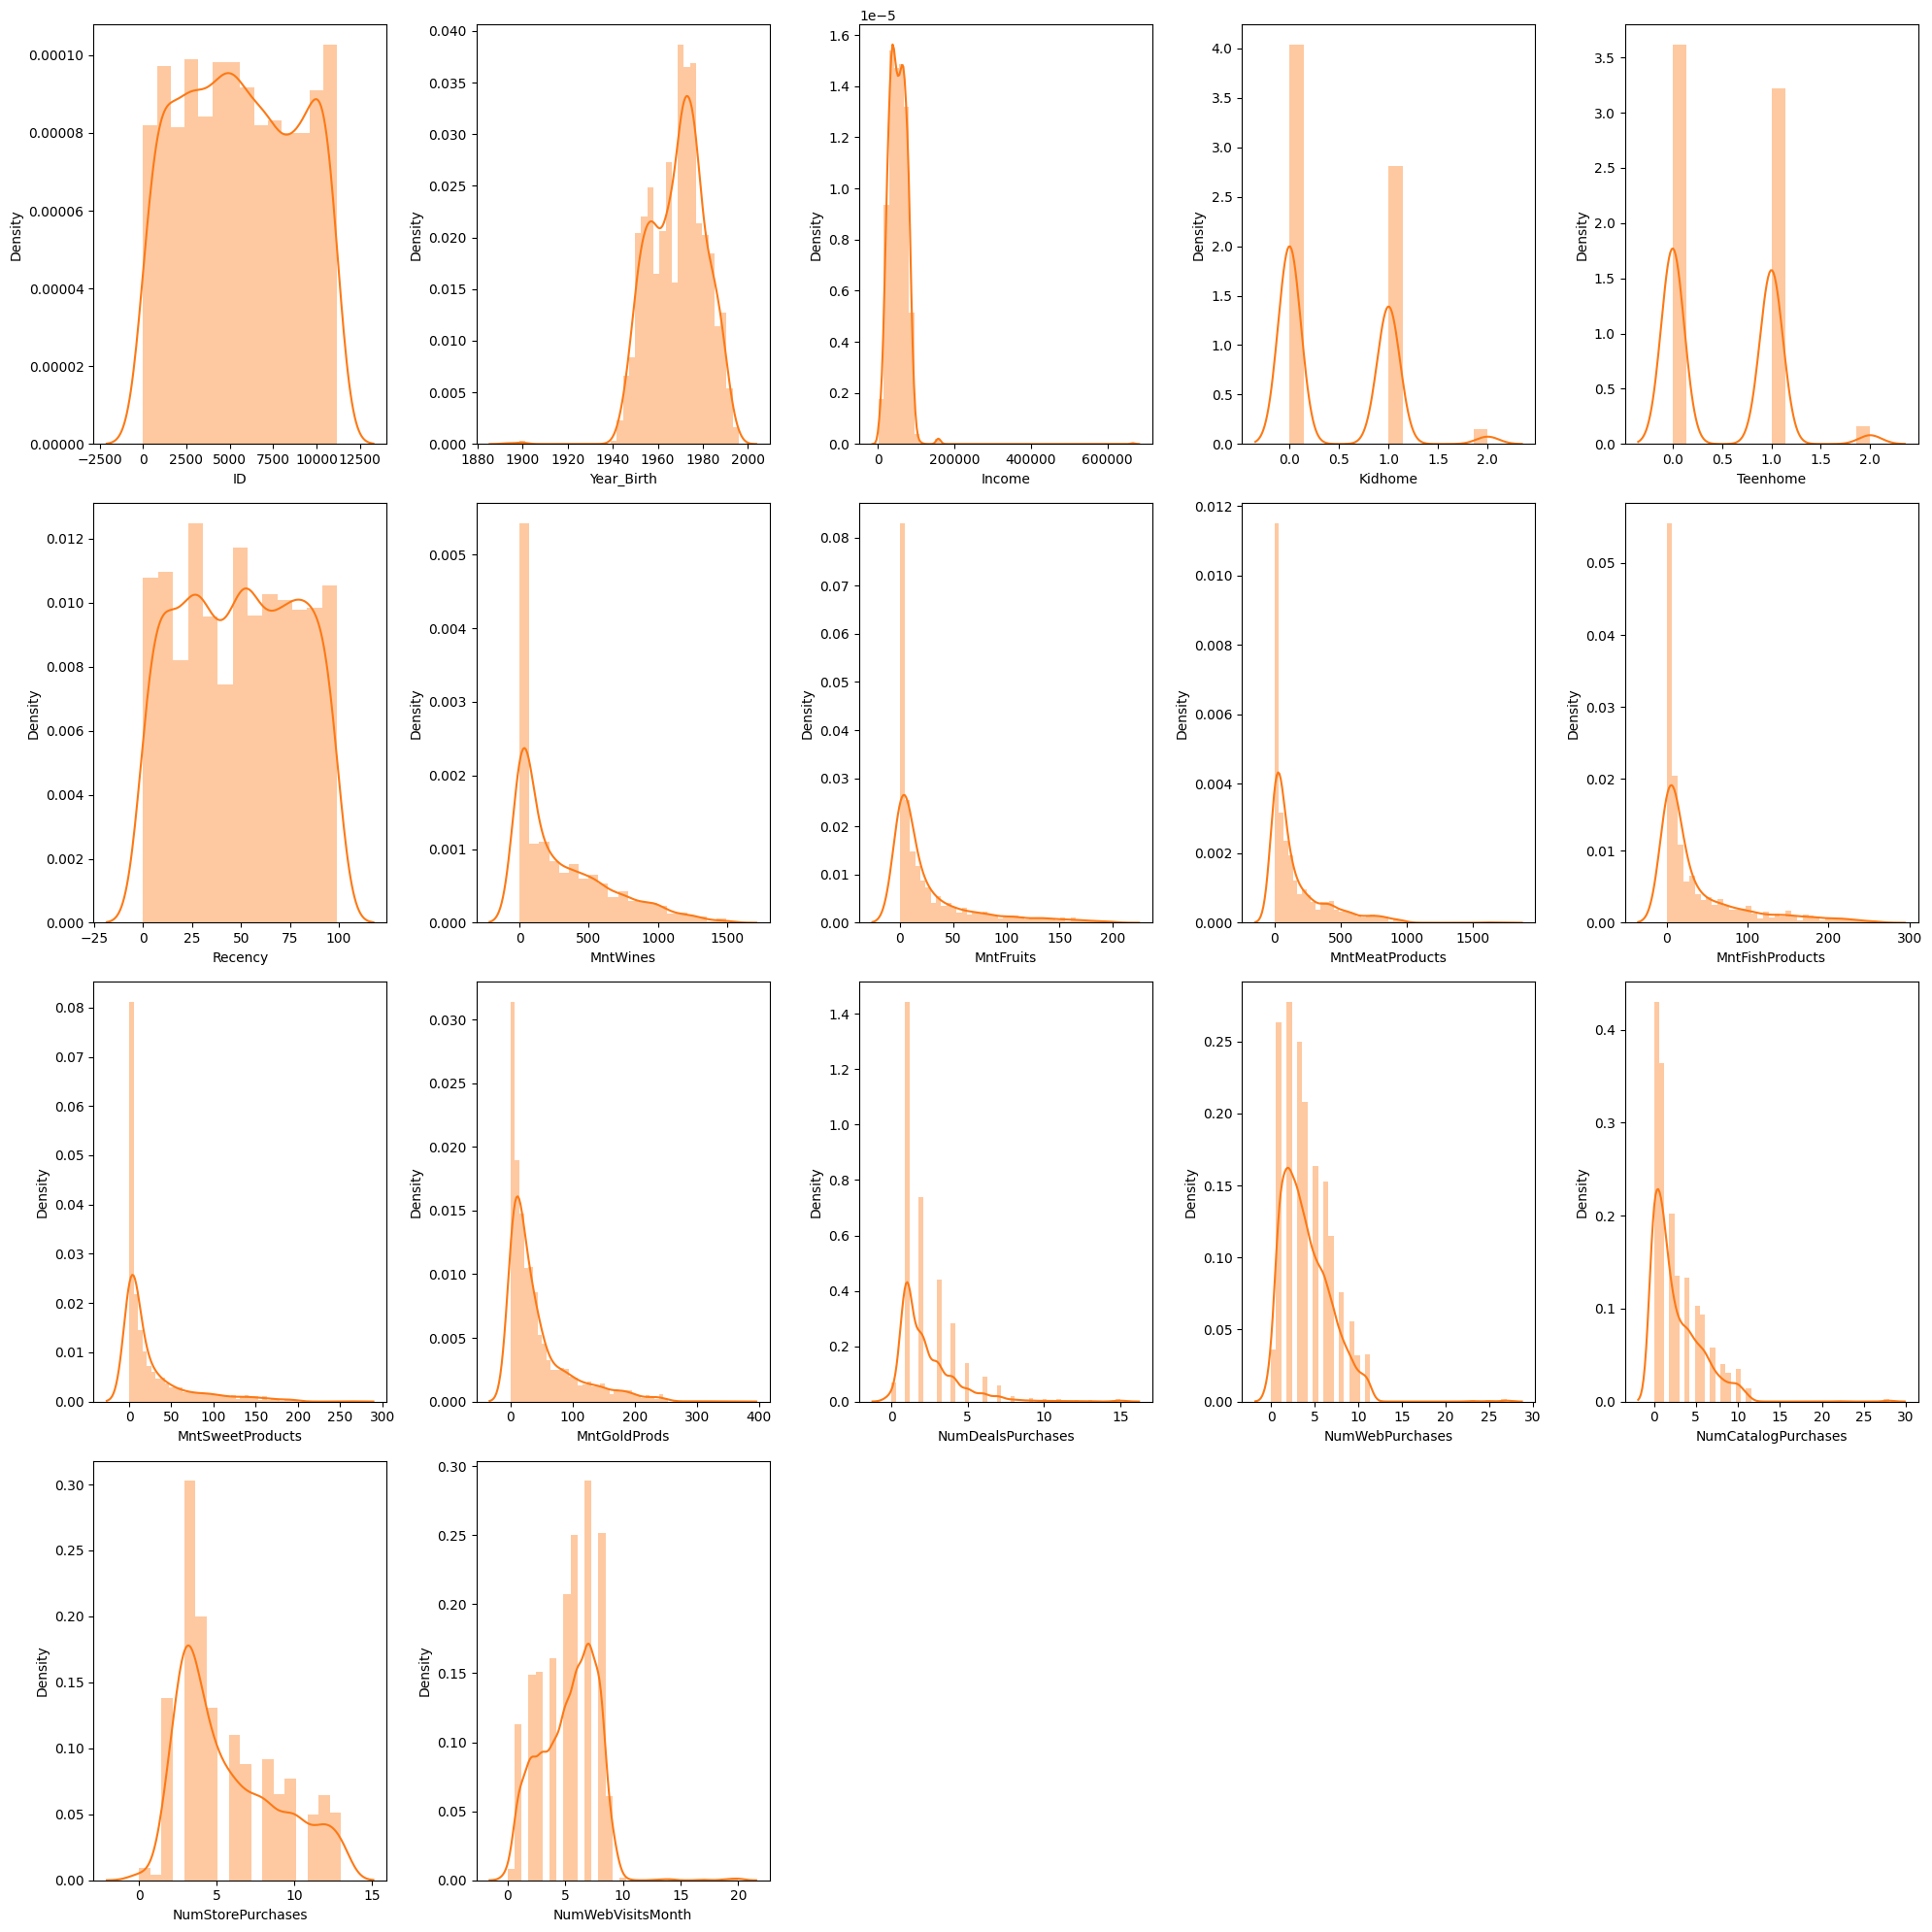

In [206]:
plt.figure(figsize=(20,20))

numerical1 = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth']

features = numerical1
for i in range(0, len(features)):
    plt.subplot(4, len(features)//4 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    sns.distplot(x=df_baru2[features[i]], color='#fd7915')
    plt.xlabel(features[i])
    plt.tight_layout()

Kesimpulan :
* Kebanyakan customer memiliki tahun kelahiran antara 1970 - 1980
* Kebanyakan customer memiliki anak remaja daripada yang masih kecil

### 4.2.2 Checking Outlier

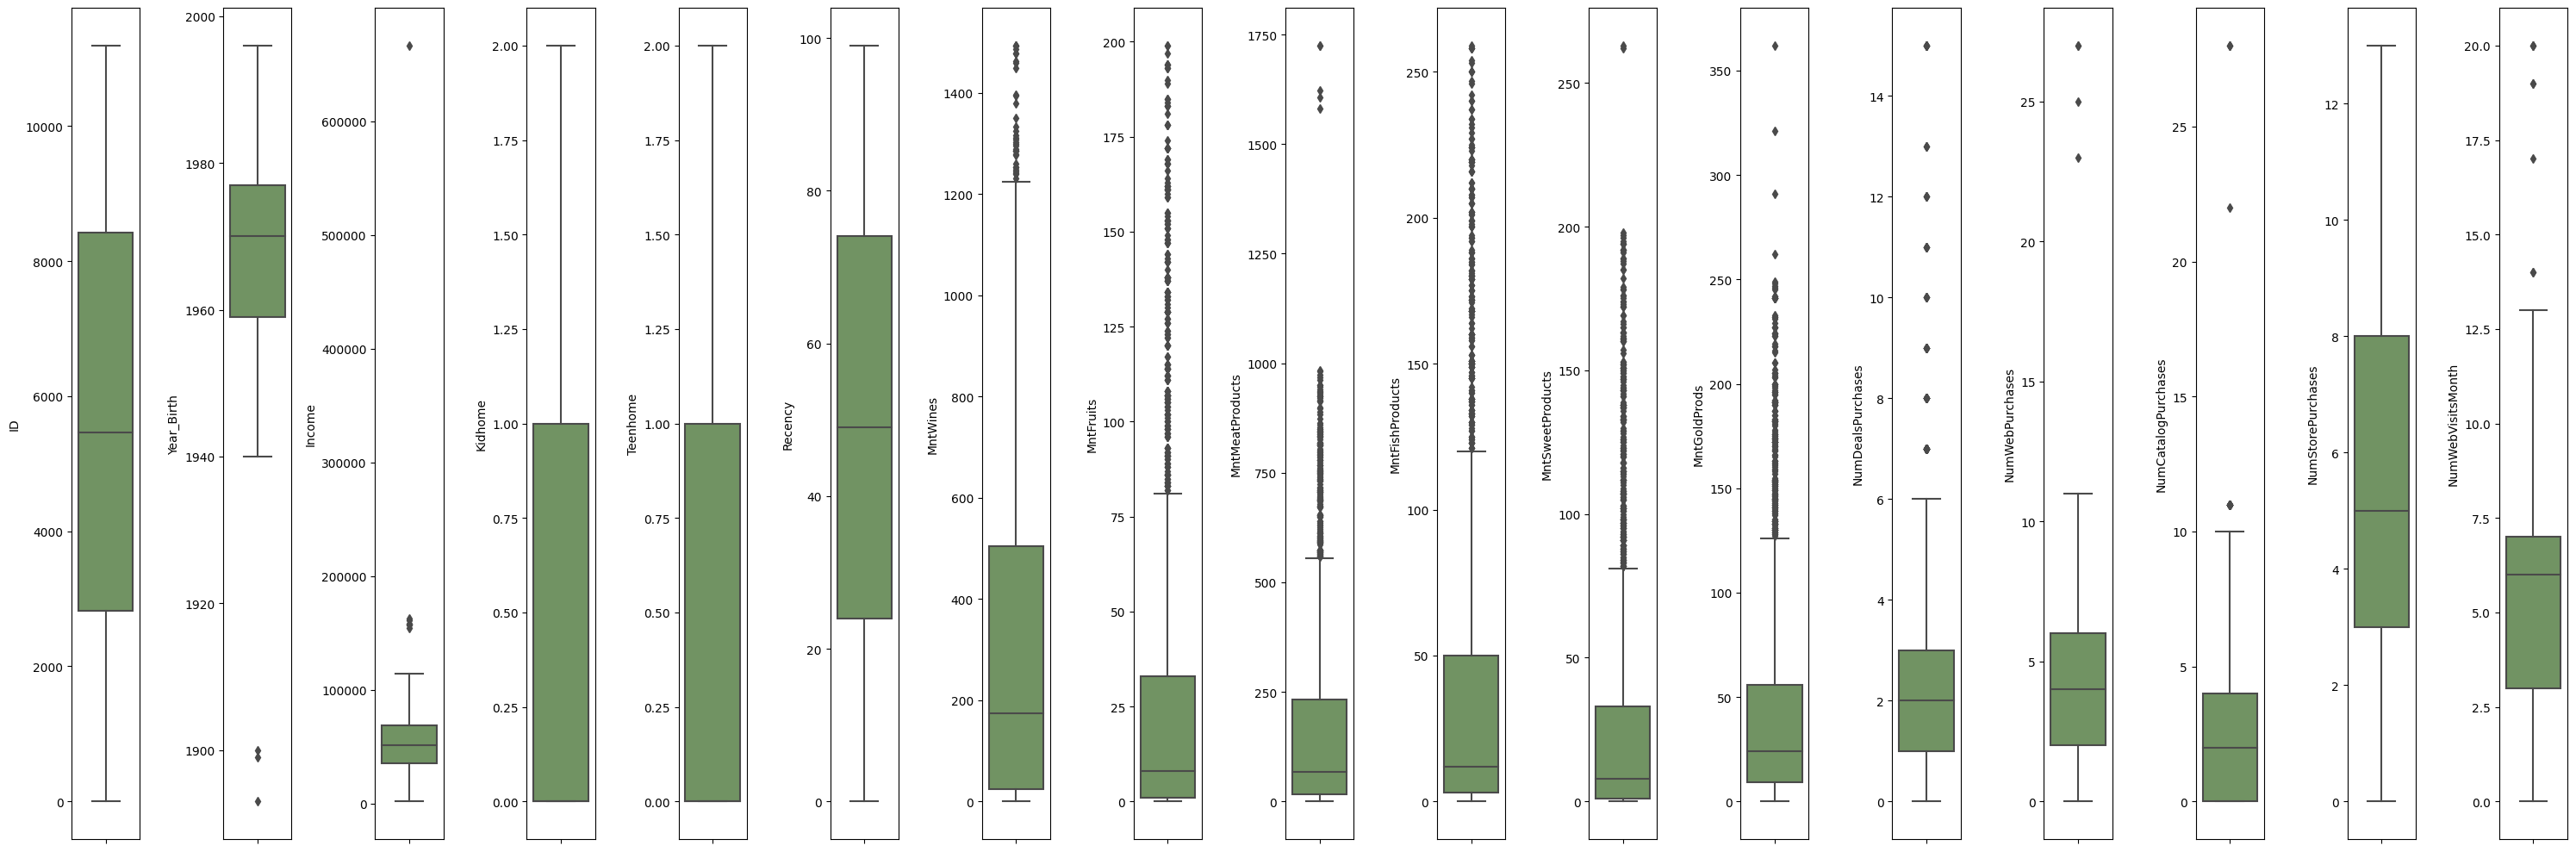

In [207]:
# Checking outlier using BOXPLOT
plt.figure(figsize=(30,10))

# plotting
features = numerical1
for i in range(0, len(features)):
    plt.subplot(1, len(features), i+1)
    sns.boxplot(y=df_baru2[features[i]], color='#6e9b5b')
    plt.tight_layout()

Kesimpulan :
* Kolom MntWines, MntFruits, MntMeatProducts, MntFishProducts, MntSweetProducts, MntGoldProds memiliki outlier yang banyak
* Outlier tidak akan di drop semuanya melainkan hanya yang tidak memiliki relevansi terhadap analisa

## 4.3 Multivariate Analysis

### 4.3.1 Heatmap Correlation

In [208]:
corr = ['ID', 'Year_Birth', 'Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
        'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2', 'Complain', 'Response' ]
    

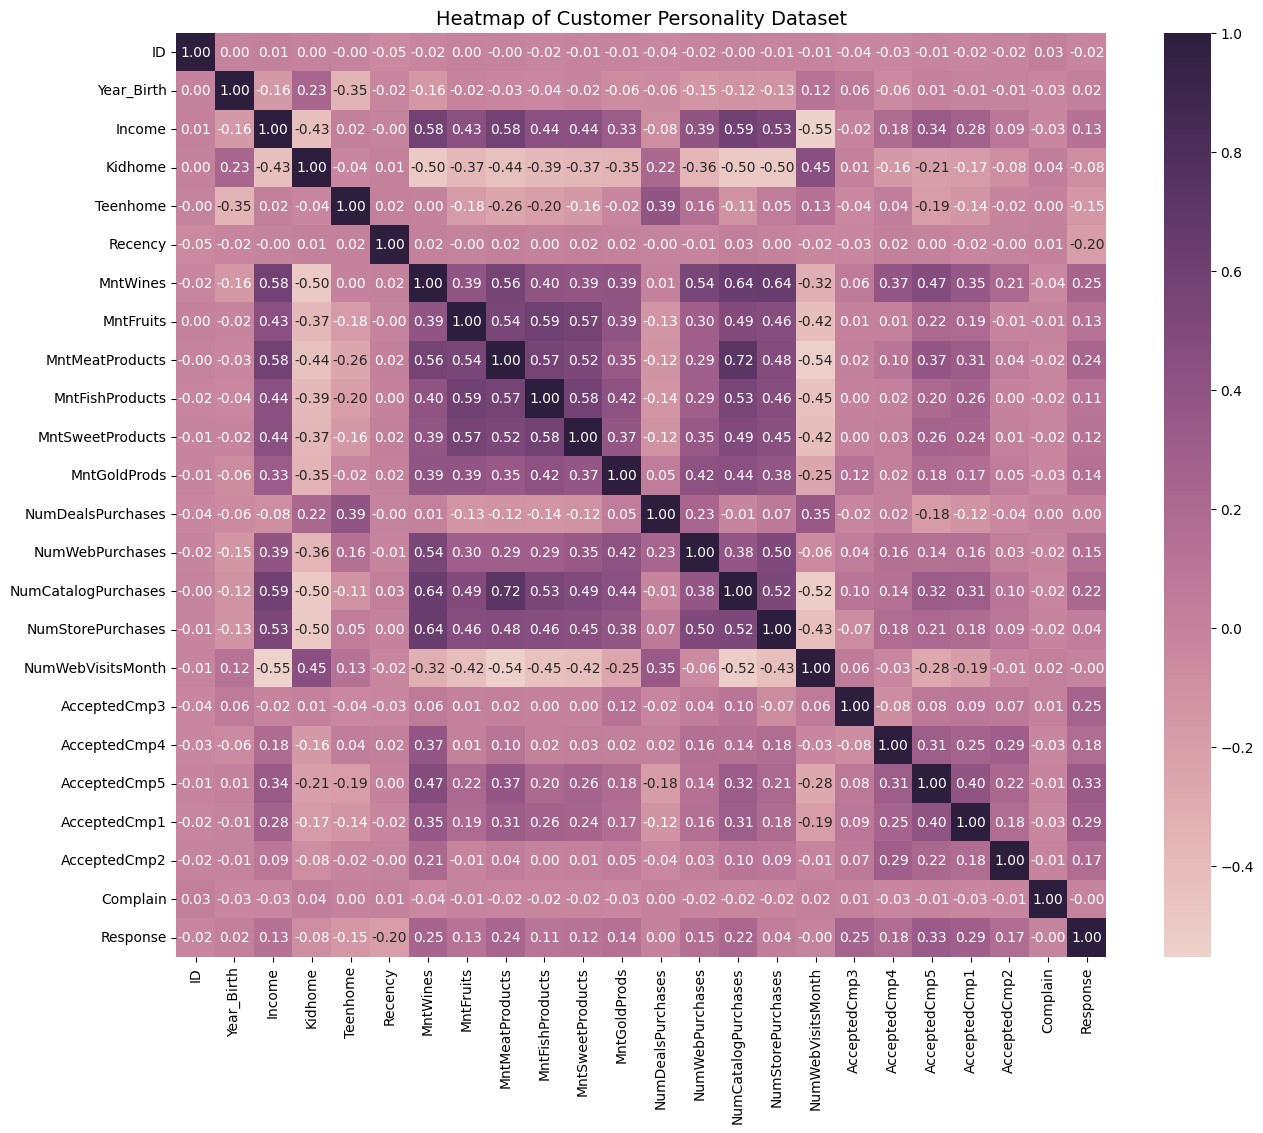

In [209]:
correlation = df_baru2[corr].corr()
plt.figure(figsize=(15, 12))
colormap = sns.cubehelix_palette(as_cmap=True)
sns.heatmap(correlation, annot=True, fmt='.2f', cmap = colormap)
plt.title('Heatmap of Customer Personality Dataset', fontsize=14)
plt.show()

Kesimpulan :
* Kolom Z_CostContact dan Z_Revenue tidak dilakukan analisa korelasi karena hanya memiliki 1 unique value
* Berdasarkan gambar diatas, tiap kolom tidak ada yang memiliki korelasi diatas 0.8 sehingga tidak ada yang perlu di drop

# 5. Data Transformation

## 5.1 Change Marital Status Column

In [210]:

df_baru3 = df_baru.copy()

In [211]:
df_baru3.Marital_Status = df.Marital_Status.replace({'Together': 'Relationship',
                                                           'Married': 'Relationship',
                                                           'Divorced': 'Single',
                                                           'Widow': 'Single', 
                                                           'Alone': 'Single',
                                                           'Absurd': 'Single',
                                                           'YOLO': 'Single'})

## 5.2 Making Age Column

Dikarenakan tahun terbesar pada data adalah 2014, maka akan digunakan current year pada tahun 2015

In [212]:
# calculate the age of each customer
df_baru3['Age'] = 2015 - df['Year_Birth']

## 5.3 Change Education Column
Kolom Education akan diubah valuenya menjadi Postgraduate dan Undergraduate

In [213]:
df_baru3["Education"] = df_baru3["Education"].replace({ "Graduation": "Postgraduate", "PhD": "Postgraduate", "Master":"Postgraduate", "2n Cycle":"Undergraduate", "Basic": "Undergraduate"})

print(df_baru3["Education"].value_counts())

Postgraduate     1983
Undergraduate    257 
Name: Education, dtype: int64


## 5.4 Making Children Column

Akan dibuat kolom Children berupa jumlah total anak yang dimiliki customer ID

In [214]:
# number of children that each customer have
df_baru3['Children'] = df_baru3['Kidhome'] + df_baru3['Teenhome']

# RFM Analysis

* Recency(R): Seberapa baru pelanggan melakukan pembelian (Recency)
* Frequency(F): Seberapa sering customer melakukan pembelian (NumPurchase)
* Monetary(M): Berapa total uang yang dikeluarkan customer saat berbelanja (Mnt)

## 5.5 Making column Num All Purchases (Frequency)

In [215]:
# Number of purchase each customer made 
df_baru3['NumAllPurchases'] = df_baru3['NumWebPurchases']+df_baru3['NumCatalogPurchases']+df_baru3['NumStorePurchases']+df_baru3['NumDealsPurchases']

## 5.6 Making Column Total Spending (Monetary)

In [216]:
# Total spent by each customer
df_baru3['TotalSpending'] = df_baru3['MntWines']+df_baru3['MntFruits']+df_baru3['MntMeatProducts']+df_baru3['MntFishProducts']+df_baru3['MntSweetProducts']+df_baru3['MntGoldProds']

# 5.7 Handling Outlier

In [217]:
df_baru4 = df_baru3.copy()

## Age

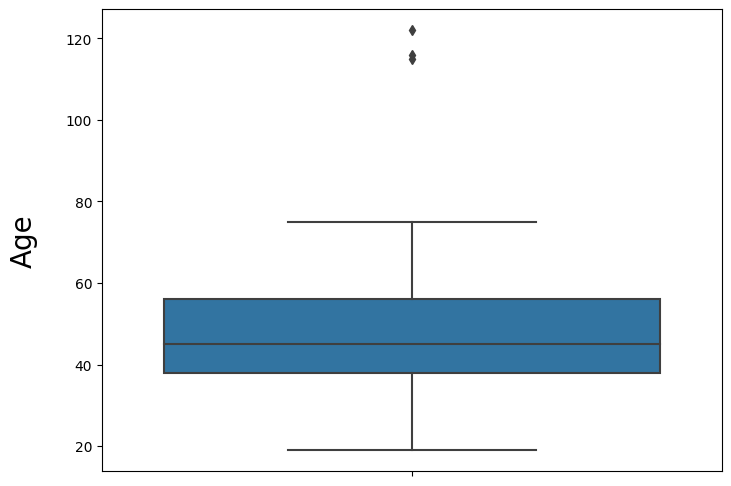

In [218]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df_baru3.Age);
plt.ylabel('Age', fontsize=20, labelpad=20);

Kolom Age masih terdapat nilai yang outlier sehingga perlu dihapus nilai age yang lebih dari 90 tahun

In [219]:
df_baru4 = df_baru4[(df_baru4['Age']<90)]

## Income

* Akan di drop outlier untuk kolom Income yang nilainya lebih dari 110000

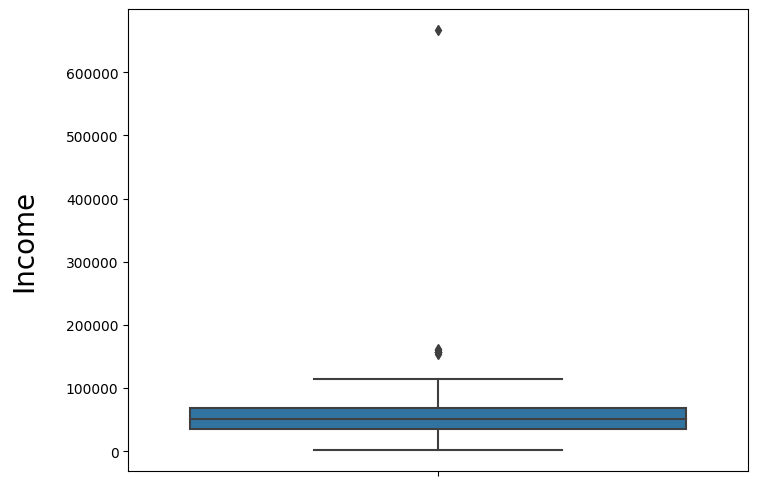

In [220]:
plt.figure(figsize=(8,6))
sns.boxplot(y=df_baru3.Income);
plt.ylabel('Income', fontsize=20, labelpad=20);

Akan di drop outlier untuk kolom Income yang nilainya lebih dari 110000

In [221]:
df_baru4 = df_baru4[(df_baru4['Income']<110000)]

# 5.8 Rename Column

In [222]:
df_baru4.rename(columns = {'MntWines':'Wines', 
                          'MntFruits':'Fruits',
                          'MntMeatProducts' : 'Meats',
                          'MntFishProducts' : 'Fish',
                          'MntSweetProducts' : 'Sweets',
                          'MntGoldProds' : 'Gold',
                          'NumDealsPurchases' : 'Deals Purchase',
                          'NumWebPurchases' : 'Web Purchase',
                          'NumCatalogPurchases' : 'Catalog Purchase',
                          'NumStorePurchases' : 'Store Purchase',
                          'NumWebVisitsMonth' : 'Web Visit',
                           'AcceptedCmp3' : 'Campaign 3',
                           'AcceptedCmp4' : 'Campaign 4',
                           'AcceptedCmp5' : 'Campaign 5',
                           'AcceptedCmp1' : 'Campaign 1',
                           'AcceptedCmp2' : 'Campaign 2'}, inplace = True)

# 6. Visualisation

### Education

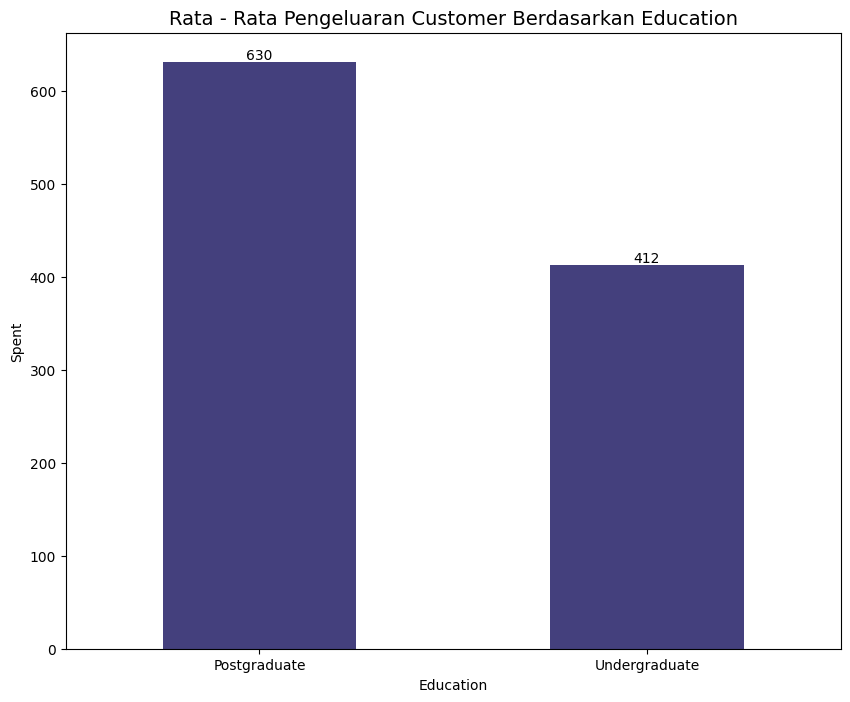

In [223]:

ax = df_baru4[['Education','TotalSpending']].groupby('Education').mean().plot(kind='bar', figsize=(10,8), legend = None, color = '#44407d')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.title('Rata - Rata Pengeluaran Customer Berdasarkan Education', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)
              

### Marital Status

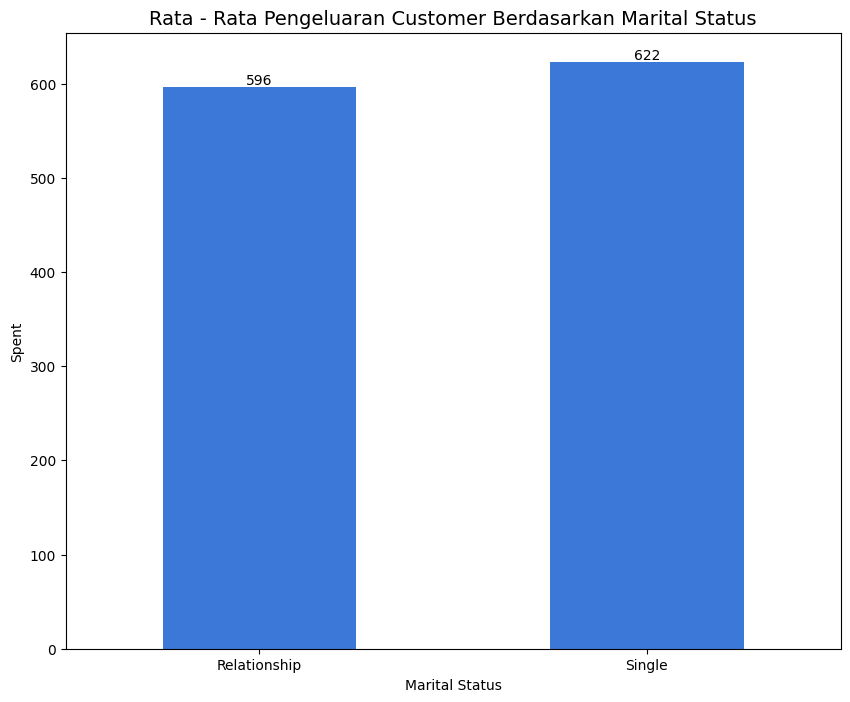

In [224]:
ax = df_baru4[['Marital_Status','TotalSpending']].groupby('Marital_Status').mean().plot(kind='bar', figsize=(10,8), legend = None, color = '#3c78d8')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.xlabel('Marital Status')
plt.title('Rata - Rata Pengeluaran Customer Berdasarkan Marital Status', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

### Children

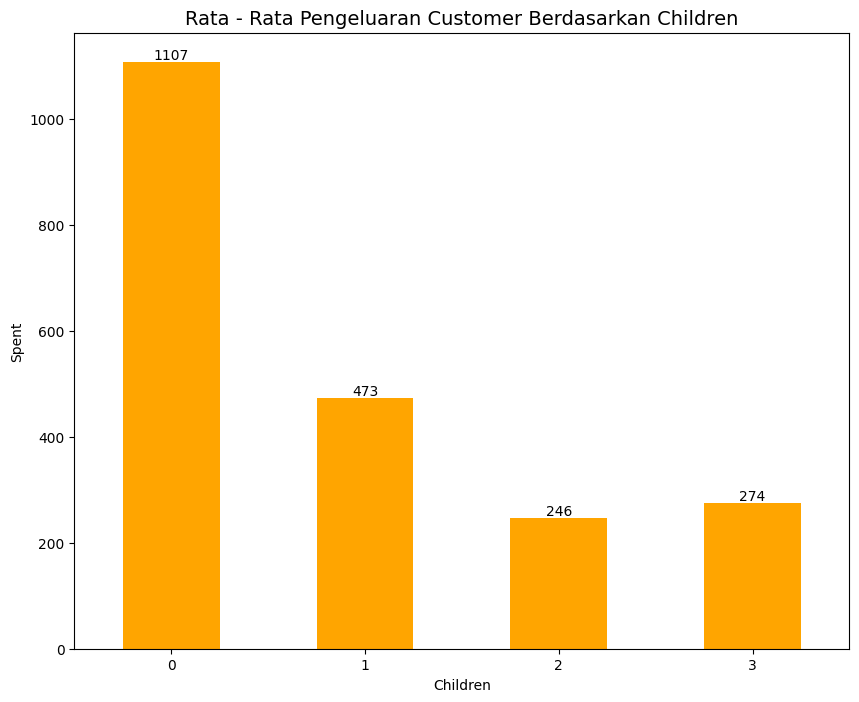

In [225]:
ax = df_baru4[['Children','TotalSpending']].groupby('Children').mean().plot(kind='bar', figsize=(10,8), legend = None, color = 'Orange')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.xlabel('Children')
plt.title('Rata - Rata Pengeluaran Customer Berdasarkan Children', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

### Age

In [226]:
age_arr = []
for x in df_baru4['Age']:
    if x <= 30:
        age_arr.append('<30')
    elif x <= 40 :
        age_arr.append('31-40')
    elif x <= 50 :
        age_arr.append('41-50')
    elif x <= 60 :
        age_arr.append('51-60')
    else:
        age_arr.append('>61')

df_baru4['age_arr'] = age_arr

In [227]:
age_arr= ['<30', '31-40', '41-50', '51-60', '>61']
age_new = (df_baru4.groupby('age_arr')['TotalSpending'].mean()).loc[age_arr]

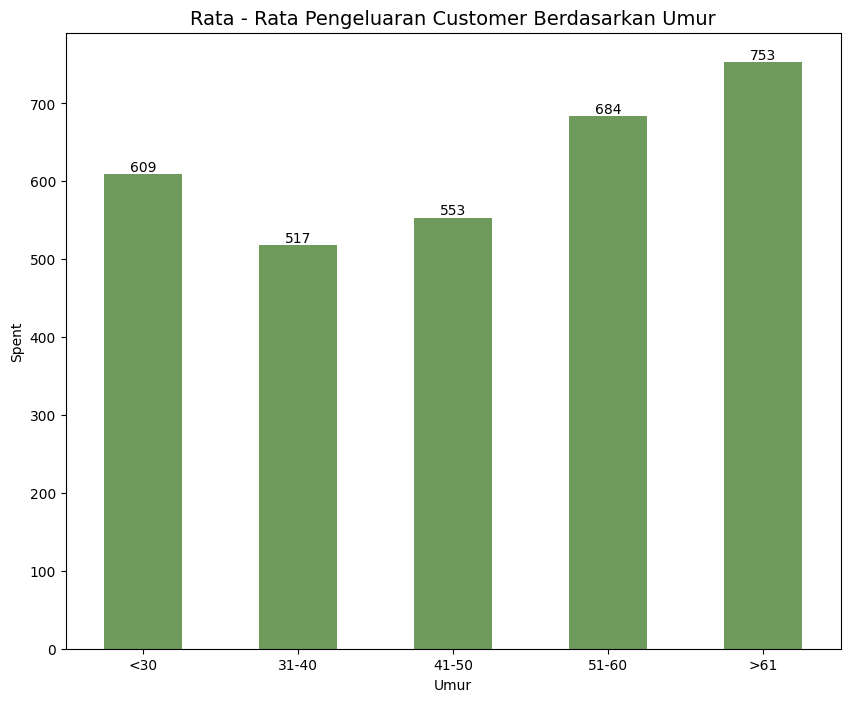

In [240]:

ax = age_new.plot(kind='bar', figsize=(10,8), legend = None, color = '#6e9b5b')
plt.xticks(rotation=0)
plt.ylabel('Spent')
plt.xlabel('Umur')
plt.title('Rata - Rata Pengeluaran Customer Berdasarkan Umur', fontsize=14)
for p in ax.patches:
  number = '{}'.format(p.get_height().astype('int64'))
  ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
              xytext=(0,5), textcoords='offset points', color='black', fontsize=10)

Ada beberapa hal yang mempengaruhi rerata pengeluaran customer yaitu:

* Tingkat pendidikan, customer yang sudah lulus cenderung memiliki rerata pengeluaran yang lebih besar karena banyak yang memang sudah memiliki penghasilan sendiri
* Status Pernikahan, customer yang single memiliki rerata pengeluaran yang lebih besar dikarenakan tidak ada tanggungan seperti customer yang dalam relationship
* Jumlah anak, semakin sedikit anak rerata pengeluaran customer cenderung lebih besar
* Umur, pengeluaran tertinggi customer adalah yang berusia diatas umur 61 tahun

### Menghitung Jumlah Customer berdasarkan Demografik Customer

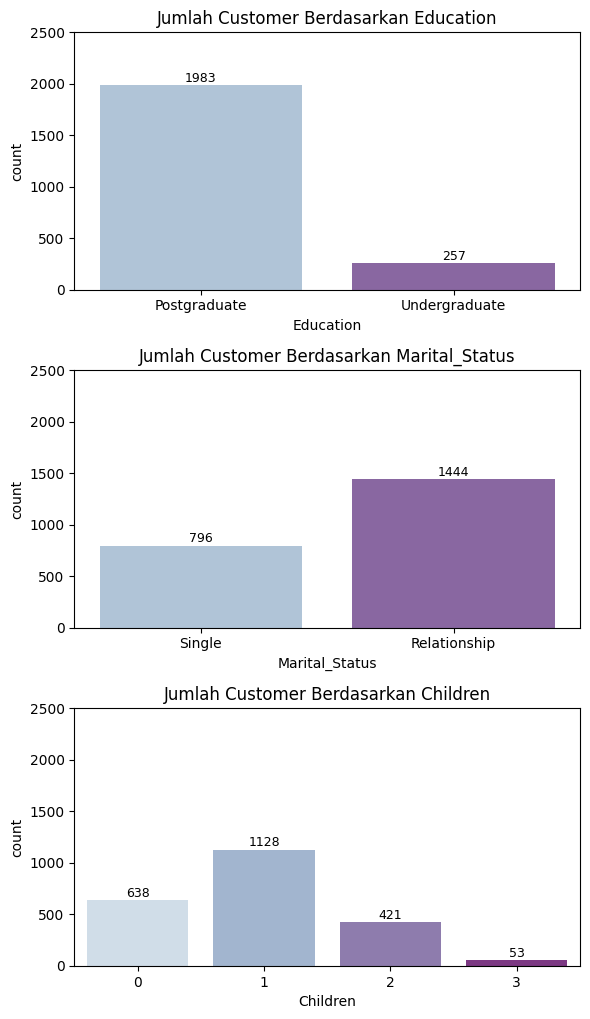

In [241]:
plt.figure(figsize=(6,20))
categorical2 = ['Education', 'Marital_Status', 'Children']
features = categorical2

for i in range(0, len(features)):
    plt.subplot(6, len(features)//6 + 1, i+1)
    #plt.subplot(1, len(features), i+1)
    ax = sns.countplot(x = df_baru3[features[i]], data=df_baru3, palette = 'BuPu')
    ax.set_title(f'Jumlah Customer Berdasarkan {features[i]}',fontsize=12)

    for p in ax.patches:
      number = '{}'.format(p.get_height().astype('int64'))
      ax.annotate(number, (p.get_x() + p.get_width()/2., p.get_height()), ha='center', va='center',
      xytext=(0,5), textcoords='offset points', color='black', fontsize=9)
    plt.ylim(0,2500)
    plt.tight_layout()

* Customer dengan latar pendidikan graduate memiliki jumlah yang lebih banyak. Hal ini juga bisa menjadi faktor tingginya pengeluaran pada customer graduate
* Customer yang single cenderung lebih sedikit daripada yang relationship. Hal ini juga membuktikan bahwa jumlah customer tidak mempengaruhi pengeluaran karena pengeluaran 
* Customer single lebih besar daripada relationship
* Customer yang memiliki anak 1 memiliki jumlah yang lebih banyak daripada yang lain.

### Mengetahui Income Bulanan Customer

In [230]:
df_baru4['year'] = pd.DatetimeIndex(df_baru4['Dt_Customer']).year
df_baru4['month'] = pd.DatetimeIndex(df_baru4['Dt_Customer']).month

In [231]:

df_baru4['new_date'] = pd.to_datetime(df_baru4.year.astype(str) + '/' + df_baru4.month.astype(str) + '/01')
df_baru4.head()

,ID,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,Wines,...,Z_Revenue,Response,Age,Children,NumAllPurchases,TotalSpending,age_arr,year,month,new_date
0,5524,1957,Postgraduate,Single,58138.0,0,0,04-09-2012,58,635,...,11,1,58,0,25,1617,51-60,2012,4,2012-04-01
1,2174,1954,Postgraduate,Single,46344.0,1,1,08-03-2014,38,11,...,11,0,61,2,6,27,>61,2014,8,2014-08-01
2,4141,1965,Postgraduate,Relationship,71613.0,0,0,21-08-2013,26,426,...,11,0,50,0,21,776,41-50,2013,8,2013-08-01
3,6182,1984,Postgraduate,Relationship,26646.0,1,0,10-02-2014,26,11,...,11,0,31,1,8,53,31-40,2014,10,2014-10-01
4,5324,1981,Postgraduate,Relationship,58293.0,1,0,19-01-2014,94,173,...,11,0,34,1,19,422,31-40,2014,1,2014-01-01


Text(0.5, 1.0, 'Income Bulanan')

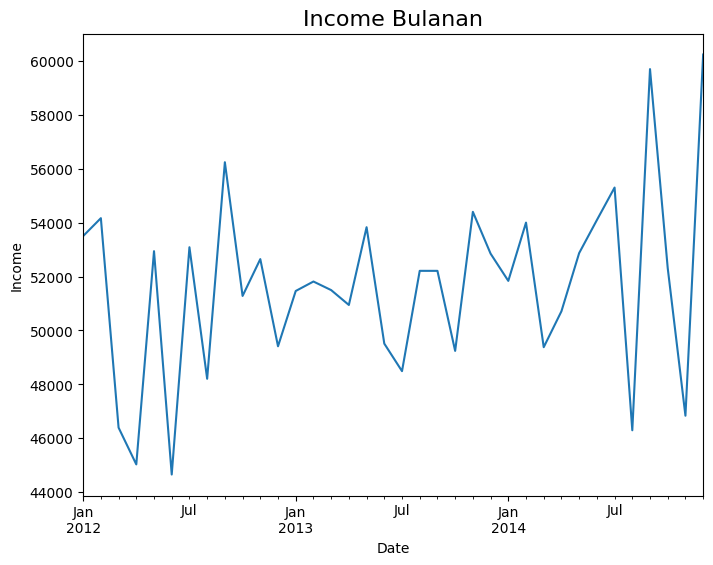

In [232]:
df_baru4.groupby(['new_date'])['Income'].mean().plot(figsize=(8,6))
plt.ylabel('Income')
plt.xlabel('Date')
plt.title('Income Bulanan', fontsize = 16 )

Rata - Rata income tertinggi dari customer adalah pada bulan Juli, September dan oktober tahun 2014

Text(0.5, 1.0, 'Pengeluaran Bulanan')

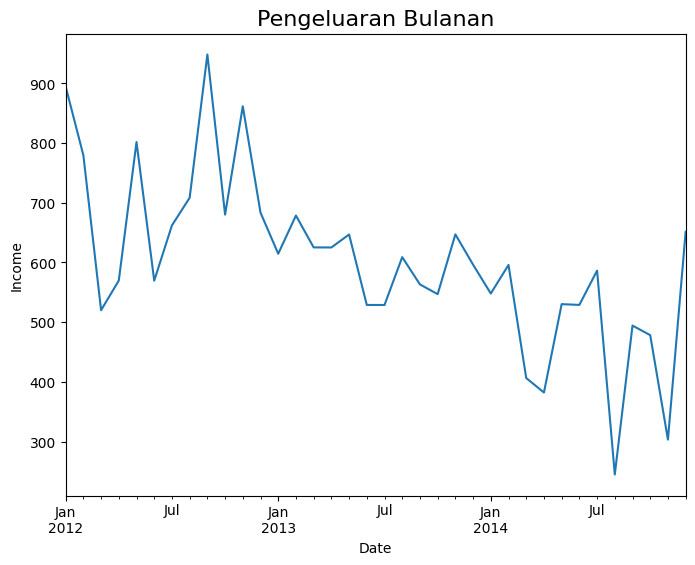

In [233]:
df_baru4.groupby(['new_date'])['TotalSpending'].mean().plot(figsize=(8,6))
plt.ylabel('Income')
plt.xlabel('Date')
plt.title('Pengeluaran Bulanan', fontsize = 16 )

pengeluaran tertinggi dari customer adalah pada bulan Januari, dan bulan Agustus tahun 2014

### Mengetahui Trend Income & Response

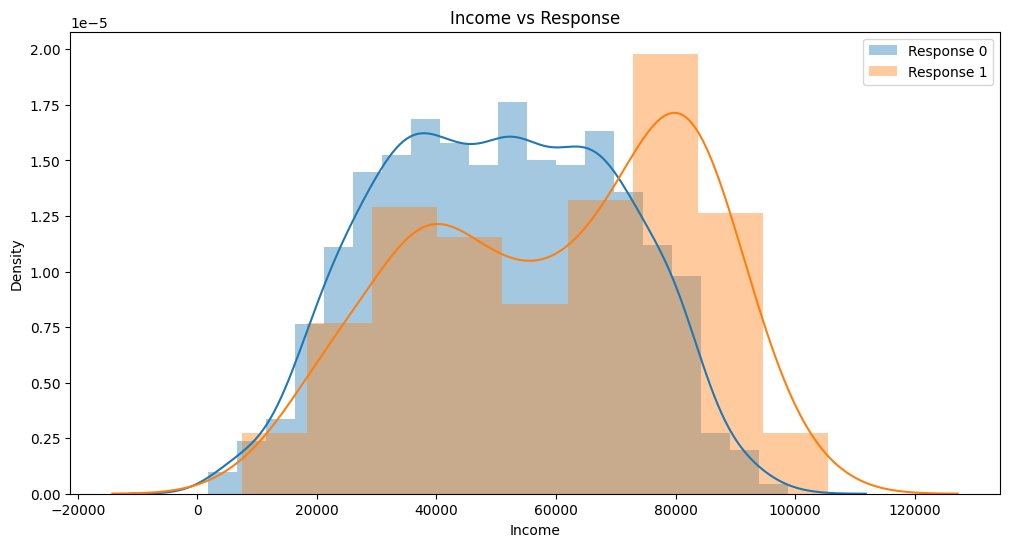

In [234]:
plt.figure(figsize=(12,6))
sns.distplot(df_baru4[df_baru4['Response']==0]['Income'], label='Response 0') 
sns.distplot(df_baru4[df_baru4['Response']==1]['Income'], label='Response 1')
plt.title('Income vs Response')
plt.legend()
plt.show()


Dari grafik tersebut, dapat dilihat bahwa pelanggan dengan pendapatan yang tinggi cenderung lebih tertarik dengan tawaran yang diberikan. Hal ini wajar karena pelanggan dengan pendapatan yang tinggi biasanya lebih mampu menerima tawaran daripada pelanggan dengan pendapatan rendah, yang sulit untuk mengalokasikan uang mereka untuk program ini. Sebelum melakukan pengujian hipotesis, pertama-tama perlu dilakukan uji distribusi normal untuk menentukan jenis uji statistik yang akan digunakan.

In [235]:
from scipy.stats import normaltest 
stats, pval=normaltest(df_baru4['Income']) 
print(stats, pval)
if pval < 0.05:
    print('Data terdistribusi tidak normal') #Ha
else:
    print('Data terdistribusi normal') #Ho

230.02805882522617 1.1221261535389055e-50
Data terdistribusi tidak normal


In [236]:
from scipy.stats import mannwhitneyu
stats,pval=mannwhitneyu(*[df_baru4 [df_baru4 ['Response']==i]['Income'] for i in df_baru4[ 'Response'].unique()], alternative='greater')
print(stats,pval)
if pval < 0.05:
    print('Tolak Ho')
else:
    print('Gagal menolak Ho')

400349.0 4.460134794858185e-15
Tolak Ho


Berdasarkan hasil uji Mann-Whitney U, terlihat bahwa terdapat perbedaan yang signifikan pada pendapatan antara pelanggan yang menerima tawaran kampanye dengan yang tidak menerima. Pelanggan yang menerima tawaran berasal dari kalangan dengan pendapatan yang tinggi. Untuk analisis yang lebih mendalam, akan dibuat diagram kotak (boxplot).

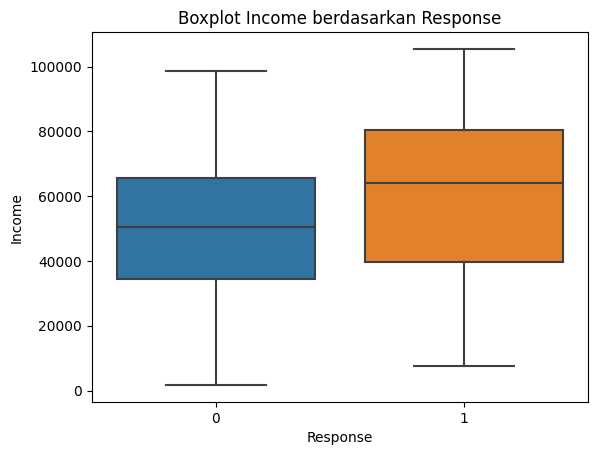

In [237]:
sns.boxplot(y='Income', x='Response', data=df_baru4) 
plt.title('Boxplot Income berdasarkan Response') 
plt.show()

Dari diagram boxplot terlihat dengan jelas bahwa pelanggan yang menerima tawaran kampanye memiliki median pendapatan yang lebih tinggi dibandingkan dengan pelanggan yang tidak menerima tawaran kampanye. Oleh karena itu, jika hanya memiliki 2 pilihan, disarankan untuk fokus melakukan kampanye pada pelanggan dengan pendapatan yang tinggi.

### Mengetahui Kategori Produk dengan Pemasukan Tertinggi

Text(0.5, 1.0, 'Total Spend tiap Product')

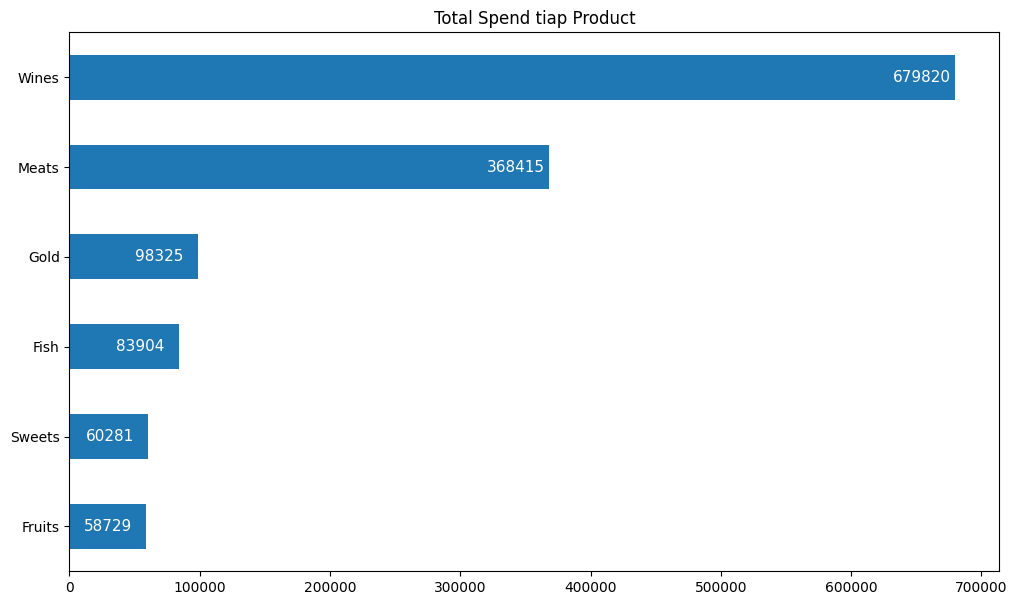

In [238]:
plt.figure(figsize=(12,7))
ax = df_baru4[['Wines', 'Fruits', 'Meats', 'Fish', 'Sweets', 'Gold']].sum().sort_values(ascending=True).plot(kind='barh')
for p in ax.patches:
      number = '{}'.format(p.get_width().astype('int64'))
      ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
      xytext=(-45,0), textcoords='offset points', color='white', fontsize=11)
ax.set_title('Total Spend tiap Product',fontsize=12)

Kategori wines merupakan produk dengan pemasukan terbanyak

### Mengetahui Platform apa yang Banyak Digunakan Customer untuk Pembelian

Text(0.5, 1.0, 'Jumlah Pembelian di Tiap Tempat')

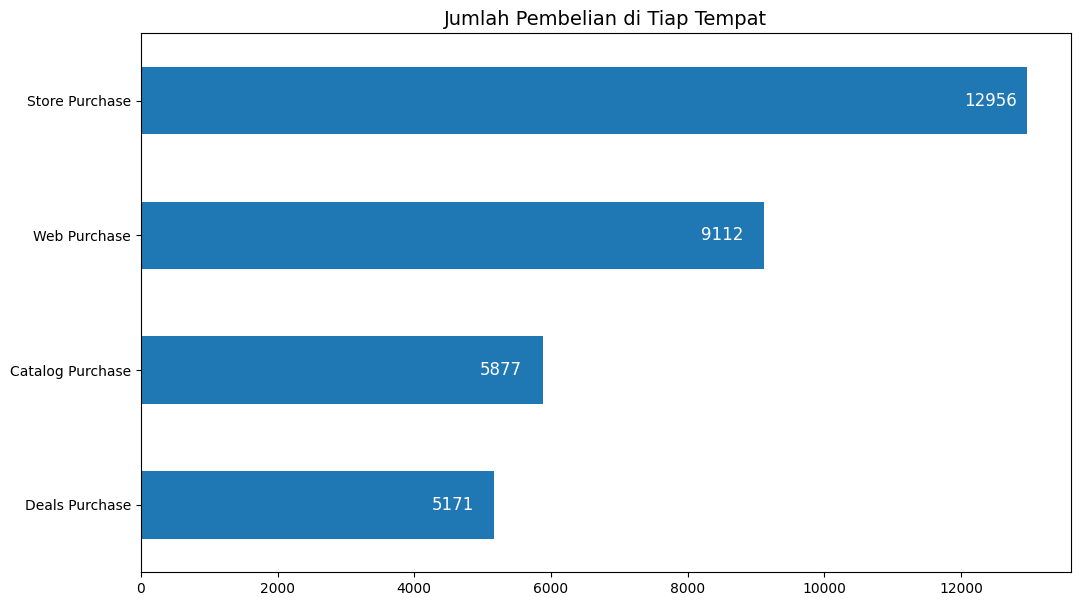

In [239]:
plt.figure(figsize=(12,7))
ax = df_baru4[['Deals Purchase', 'Web Purchase', 'Catalog Purchase', 'Store Purchase']].sum().sort_values(ascending=True).plot(kind='barh')
for p in ax.patches:
      number = '{}'.format(p.get_width().astype('int64'))
      ax.annotate(number, (p.get_width(), p.get_y() + p.get_height()/2), ha='left', va='center',
      xytext=(-45,0), textcoords='offset points', color='white', fontsize=12)
ax.set_title('Jumlah Pembelian di Tiap Tempat',fontsize=14)

#### Conclusion 

Dari hasil analisis Marketing Campaign dataset, maka dapat disimpulkan bahwa:
* Rata - Rata income tertinggi dari customer adalah pada bulan Juli, September, dan Oktober tahun 2014. Ini menunjukkan bahwa pada periode tersebut, customer memiliki pendapatan yang lebih tinggi dibandingkan dengan periode lainnya.

* Pengeluaran tertinggi dari customer terjadi pada bulan Januari dan Agustus tahun 2014. Hal ini menunjukkan bahwa pada periode tersebut, customer cenderung membeli produk dengan jumlah yang lebih banyak atau barang yang lebih mahal.

* Dari grafik yang disajikan, dapat dilihat bahwa pelanggan dengan pendapatan yang tinggi cenderung lebih tertarik dengan tawaran yang diberikan. Hal ini wajar karena pelanggan dengan pendapatan yang lebih tinggi biasanya lebih mampu untuk membeli produk dan menerima tawaran, sedangkan pelanggan dengan pendapatan yang lebih rendah mungkin akan lebih sulit untuk mengalokasikan uang mereka untuk program ini. Sebelum melakukan pengujian hipotesis, perlu dilakukan uji distribusi normal untuk menentukan jenis uji statistik yang akan digunakan.

* Kategori wines merupakan produk dengan pemasukan terbanyak. Hal ini menunjukkan bahwa produk ini merupakan produk yang paling populer dan banyak diminati oleh customer.

* Pelanggan paling banyak melakukan transaksi yaitu langsung datang ke store. Ini menunjukkan bahwa pelanggan cenderung lebih suka untuk membeli produk secara langsung, mungkin untuk mendapatkan pengalaman langsung dengan produk yang dibeli.

#### Recommendation

Dari hasil penarikan kesimpulan analisis Marketing Campaign dataset, maka beberapa rekomendasi untuk meningkatkan efektifitas dan efisiensi usaha marketing pada perusahaan adalah:
* Dalam mengelola bisnis, penting untuk memperhatikan periode waktu tertentu, seperti bulan-bulan yang memiliki rata-rata income tertinggi dan pengeluaran tertinggi dari customer. Dengan mengetahui periode waktu ini, bisnis dapat menentukan strategi penjualan dan promosi yang tepat untuk meningkatkan penjualan.

* Bisnis perlu memperhatikan pelanggan dengan pendapatan tinggi karena mereka cenderung lebih tertarik dengan tawaran yang diberikan. Namun, bukan berarti pelanggan dengan pendapatan rendah tidak penting. Bisnis dapat menawarkan tawaran khusus atau diskon untuk menarik minat pelanggan dengan pendapatan rendah agar tetap membeli produk.

* Sebelum melakukan pengujian hipotesis, perlu dilakukan uji distribusi normal untuk menentukan jenis uji statistik yang akan digunakan. Ini akan memastikan bahwa data yang digunakan valid dan akurat dalam melakukan pengujian hipotesis.

* Kategori wines merupakan produk dengan pemasukan terbanyak, sehingga bisnis dapat mempertimbangkan untuk meningkatkan stok dan ketersediaan produk tersebut. Namun, bukan berarti bisnis tidak perlu memperhatikan produk lainnya. Bisnis juga dapat mengembangkan produk-produk lain yang menarik minat pelanggan.

* Pelanggan cenderung lebih suka untuk membeli produk secara langsung, sehingga bisnis perlu memastikan bahwa toko memiliki pengalaman belanja yang menyenangkan dan memberikan kepuasan pelanggan. Bisnis juga dapat mengembangkan platform online untuk memudahkan pelanggan dalam melakukan pembelian.